# Setup

In [1]:
import numpy as np
import sklearn
import sklearn.datasets
import scipy.io
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Helper Functions

In [2]:
def plot_decision_boundary(model, X, y):
    # Set min and max values and give it some padding
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[0, :], X[1, :], c=y[0, :], cmap=plt.cm.Spectral)
    plt.show()

In [3]:
def predict_dec(params, X):
    """
    Used for plotting decision boundary.
    
    Arguments
    parameters -- python dictionary containing your parameters 
    X -- input data of size (m, K)
    
    Returns
    predictions -- vector of predictions of our model (red: 0 / blue: 1)
    """
    
    # Predict using forward propagation and a classification threshold of 0.5
    a3, cache = forward_propagation(X, params)
    predictions = (a3>0.5).astype(int)
    return predictions

In [4]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

In [5]:
def relu(x):
    return np.maximum(0, x)

# 1. Initialization
## 1.1 Initialization methods
- He Initialization (for ReLU)

In [6]:
def initialize_params_he(layers_dims):
    '''
    Implement random initialization using He scale
    
    layers_dims: python array (list), containing the dimensions of each layer 
                (including input layer)
    '''
    
    #np.random.seed(3)
    params = {}
    L = len(layers_dims) - 1
    
    for l in range(1, L+1):
        params['W' + str(l)] = np.random.randn(layers_dims[l], layers_dims[l-1]) * np.sqrt(2./layers_dims[l-1])
        params['b' + str(l)] = np.zeros((layers_dims[l], 1))
    
    return params

- Xavier Initialization (for tanh)

In [7]:
def initialize_params_xavier(layers_dims):
    '''
    Implement random initialization using Xavier scale

    layers_dims: python array (list), containing the dimensions of each layer 
                (including input layer)
    '''
    
    # np.random.seed(3)
    params = {}
    L = len(layers_dims) - 1
    
    for l in range(1, L+1):
        params['W' + str(l)] = np.random.randn(layers_dims[l], layers_dims[l-1]) * np.sqrt(1./layers_dims[l-1])
        params['b' + str(l)] = np.zeros((layers_dims[l], 1))
    
    return params

## 1.2 Modules
Application with a 3-layer neural network

In [8]:
def forward_propagation(X, params):
    
    # Retrieve params
    W1 = params["W1"]
    b1 = params["b1"]
    W2 = params["W2"]
    b2 = params["b2"]
    W3 = params["W3"]
    b3 = params["b3"]
    
    # LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SIGMOID
    Z1 = np.dot(W1, X) + b1
    A1 = relu(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = relu(Z2)
    Z3 = np.dot(W3, A2) + b3
    A3 = sigmoid(Z3)
    
    cache = (Z1, A1, W1, b1, Z2, A2, W2, b2, Z3, A3, W3, b3)
    
    return A3, cache

In [9]:
def compute_cost(A3, Y):
    
    m = Y.shape[1]
    logprobs = -(Y * np.log(A3) + (1 - Y) * np.log(1 - A3))
    cost = 1./m * np.nansum(logprobs)
    
    return cost

In [10]:
def backward_propagation(X, Y, cache):
    
    m = X.shape[1]
    (Z1, A1, W1, b1, Z2, A2, W2, b2, Z3, A3, W3, b3) = cache
    
    dZ3 = A3 - Y
    dW3 = 1./m * np.dot(dZ3, A2.T)
    db3 = 1./m * np.sum(dZ3, axis=1, keepdims = True)
    dA2 = np.dot(W3.T, dZ3)
    
    dZ2 = np.multiply(dA2, np.int64(A2 > 0))
    dW2 = 1./m * np.dot(dZ2, A1.T)
    db2 = 1./m * np.sum(dZ2, axis=1, keepdims = True)
    dA1 = np.dot(W2.T, dZ2)
    
    dZ1 = np.multiply(dA1, np.int64(A1 > 0))
    dW1 = 1./m * np.dot(dZ1, X.T)
    db1 = 1./m * np.sum(dZ1, axis=1, keepdims = True)
    
    grads = {"dZ3": dZ3, "dW3": dW3, "db3": db3,
             "dA2": dA2, "dZ2": dZ2, "dW2": dW2, "db2": db2,
             "dA1": dA1, "dZ1": dZ1, "dW1": dW1, "db1": db1}
    
    return grads

In [11]:
def update_GD(params, grads, lr):
    
    L = len(params) // 2
    
    for l in range(1, L+1):
        params['W' + str(l)] = params['W' + str(l)] - lr * grads['dW' + str(l)]
        params['b' + str(l)] = params['b' + str(l)] - lr * grads['db' + str(l)]
    
    return params

In [12]:
def predict(X, Y, params):
    
    m = X.shape[1]
    A3,_ = forward_propagation(X, params)
    
    p = (A3 > 0.5).astype(int)
    
    print('Accuracy: ' + str(np.sum(p == Y) / m))
    
    return p

## 1.3 Experiment

- Data Overview

In [13]:
def load_dataset():
    np.random.seed(1)
    train_X, train_Y = sklearn.datasets.make_circles(n_samples=300, noise=.05)
    np.random.seed(2)
    test_X, test_Y = sklearn.datasets.make_circles(n_samples=100, noise=.05)
    # Visualize the data
    plt.scatter(train_X[:, 0], train_X[:, 1], c=train_Y, s=40, cmap=plt.cm.Spectral);
    train_X = train_X.T
    train_Y = train_Y.reshape((1, train_Y.shape[0]))
    test_X = test_X.T
    test_Y = test_Y.reshape((1, test_Y.shape[0]))
    return train_X, train_Y, test_X, test_Y

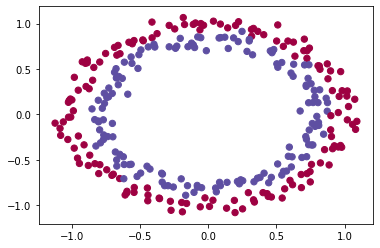

In [14]:
train_X, train_Y, test_X, test_Y = load_dataset()

- Model

In [15]:
def model1(X, Y, lr=0.01, epochs=15000, initial='he', print_cost=False):
    
    costs = []
    layers_dims = [X.shape[0], 10, 5, 1]
    np.random.seed(3)
    
    if initial == 'he':
        params = initialize_params_he(layers_dims)
    elif initial == 'xavier':
        params = initialize_params_xavier(layers_dims)
    
    # Gradient Descent
    for i in range(epochs):
        ## forward propogation
        A3, cache = forward_propagation(X, params)
        
        ## cost
        cost = compute_cost(A3, Y)
        
        ## backward propogation
        grads = backward_propagation(X, Y, cache)
        
        ## update parameters
        params = update_GD(params, grads, lr)
        
        ## print the cost every 1000 iterations
        if print_cost and i % 1000 == 0:
            print("Cost after iteration %d: %f" % (i, cost))
            costs.append(cost)
    
    # Plot the cost vs iterations
    plt.plot(costs)
    plt.ylabel('Cost')
    plt.xlabel('iterations (x1000)')
    plt.title('Learning rate = ' + str(lr))
    plt.show()
    
    return params

- Train and Predict

Cost after iteration 0: 0.883054
Cost after iteration 1000: 0.687983
Cost after iteration 2000: 0.675129
Cost after iteration 3000: 0.652612
Cost after iteration 4000: 0.608296
Cost after iteration 5000: 0.530494
Cost after iteration 6000: 0.413865
Cost after iteration 7000: 0.311780
Cost after iteration 8000: 0.236962
Cost after iteration 9000: 0.185973
Cost after iteration 10000: 0.150156
Cost after iteration 11000: 0.123251
Cost after iteration 12000: 0.099177
Cost after iteration 13000: 0.084571
Cost after iteration 14000: 0.073579


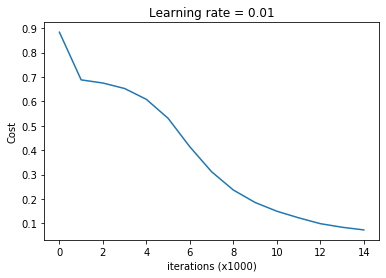

On the train set:
Accuracy: 0.9933333333333333
On the test set:
Accuracy: 0.96


In [16]:
params = model1(train_X, train_Y, initial="he", print_cost=True)
print ("On the train set:")
predictions_train = predict(train_X, train_Y, params)
print ("On the test set:")
predictions_test = predict(test_X, test_Y, params)

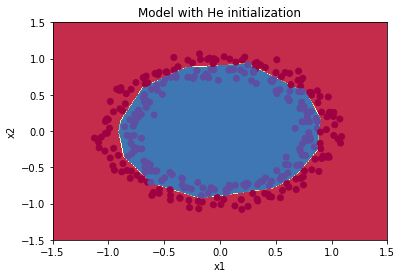

In [17]:
plt.title("Model with He initialization")
axes = plt.gca()
axes.set_xlim([-1.5,1.5])
axes.set_ylim([-1.5,1.5])
plot_decision_boundary(lambda x: predict_dec(params, x.T), train_X, train_Y)

# 2. Regularization
## 2.1 L2-Regularization
- Cost function with L2

In [18]:
def compute_cost_L2(A3, Y, params, lambd):
    
    m = Y.shape[1]
    W1 = params['W1']
    W2 = params['W2']
    W3 = params['W3']
    
    # Cross entropy term
    cross_entropy = compute_cost(A3, Y)
    
    # L2 regularization term
    L2_regularization = 1./m * lambd/2 * (np.sum(np.square(W1)) + np.sum(np.square(W2)) + np.sum(np.square(W3)))
    
    # Total cost
    cost = cross_entropy + L2_regularization
    
    return cost

- Backward propagation with L2

In [19]:
def backward_propagation_L2(X, Y, cache, lambd):
    
    m = X.shape[1]
    (Z1, A1, W1, b1, Z2, A2, W2, b2, Z3, A3, W3, b3) = cache
    
    dZ3 = A3 - Y
    dW3 = 1./m * np.dot(dZ3, A2.T) + lambd/m * W3
    db3 = 1./m * np.sum(dZ3, axis=1, keepdims = True)
    dA2 = np.dot(W3.T, dZ3)
    
    dZ2 = np.multiply(dA2, np.int64(A2 > 0))
    dW2 = 1./m * np.dot(dZ2, A1.T) + lambd/m * W2
    db2 = 1./m * np.sum(dZ2, axis=1, keepdims = True)
    dA1 = np.dot(W2.T, dZ2)
    
    dZ1 = np.multiply(dA1, np.int64(A1 > 0))
    dW1 = 1./m * np.dot(dZ1, X.T) + lambd/m * W1
    db1 = 1./m * np.sum(dZ1, axis=1, keepdims = True)
    
    grads = {"dZ3": dZ3, "dW3": dW3, "db3": db3,
             "dA2": dA2, "dZ2": dZ2, "dW2": dW2, "db2": db2,
             "dA1": dA1, "dZ1": dZ1, "dW1": dW1, "db1": db1}
    
    return grads

## 2.2 Dropout-Regularization
- Forward propagation with dropout (only for Hidden Layer 1 and 2)

In [20]:
def forward_propagation_dropout(X, params, keep_prob):
    
    np.random.seed(1)
    
    # Retrieve params
    W1 = params["W1"]
    b1 = params["b1"]
    W2 = params["W2"]
    b2 = params["b2"]
    W3 = params["W3"]
    b3 = params["b3"]
    
    # Layer 1: LINEAR -> RELU
    Z1 = np.dot(W1, X) + b1
    A1 = relu(Z1)
    ## Dropout for layer 1
    D1 = np.random.rand(A1.shape[0], A1.shape[1])
    D1 = (D1 < keep_prob).astype(int)
    A1 = np.multiply(A1, D1)
    A1 = A1/keep_prob
    
    # Layer 2: LINEAR -> RELU
    Z2 = np.dot(W2, A1) + b2
    A2 = relu(Z2)
    ## Dropout for layer 2
    D2 = np.random.rand(A2.shape[0], A2.shape[1])
    D2 = (D2 < keep_prob).astype(int)
    A2 = np.multiply(A2, D2)
    A2 = A2/keep_prob
    
    # Layer 3: LINEAR -> SIGMOID
    Z3 = np.dot(W3, A2) + b3
    A3 = sigmoid(Z3)

    cache = (Z1, D1, A1, W1, b1, Z2, D2, A2, W2, b2, Z3, A3, W3, b3)
    
    return A3, cache

- Backward propagation with dropout

In [21]:
def backward_propagation_dropout(X, Y, cache, keep_prob):
    
    m = X.shape[1]
    (Z1, D1, A1, W1, b1, Z2, D2, A2, W2, b2, Z3, A3, W3, b3) = cache
    
    dZ3 = A3 - Y
    dW3 = 1./m * np.dot(dZ3, A2.T)
    db3 = 1./m * np.sum(dZ3, axis=1, keepdims = True)
    dA2 = np.dot(W3.T, dZ3)
    
    # Dropout for layer 2
    dA2 = np.multiply(dA2, D2)
    dA2 = dA2/keep_prob
    
    dZ2 = np.multiply(dA2, np.int64(A2 > 0))
    dW2 = 1./m * np.dot(dZ2, A1.T)
    db2 = 1./m * np.sum(dZ2, axis=1, keepdims = True)
    dA1 = np.dot(W2.T, dZ2)
    
    # Dropout for layer 1
    dA1 = np.multiply(dA1, D1)
    dA1 = dA1/keep_prob
    
    dZ1 = np.multiply(dA1, np.int64(A1 > 0))
    dW1 = 1./m * np.dot(dZ1, X.T)
    db1 = 1./m * np.sum(dZ1, axis=1, keepdims = True)
    
    grads = {"dZ3": dZ3, "dW3": dW3, "db3": db3,
             "dA2": dA2, "dZ2": dZ2, "dW2": dW2, "db2": db2,
             "dA1": dA1, "dZ1": dZ1, "dW1": dW1, "db1": db1}
    
    return grads

## 2.3 Experiment
- Data Overview

In [22]:
def load_2D_dataset():
    data = scipy.io.loadmat('./data.mat')
    train_X = data['X'].T
    train_Y = data['y'].T
    test_X = data['Xval'].T
    test_Y = data['yval'].T

    plt.scatter(train_X[0, :], train_X[1, :], c=train_Y[0, :], s=40, cmap=plt.cm.Spectral);
    
    return train_X, train_Y, test_X, test_Y

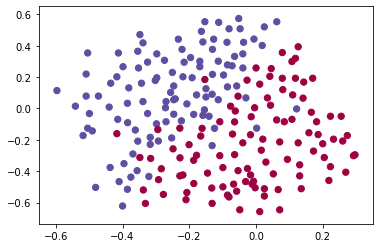

In [23]:
train_X, train_Y, test_X, test_Y = load_2D_dataset()

- Model

In [24]:
def model2(X, Y, lr=0.3, epochs=30000, lambd=0, keep_prob=1, print_cost=False):
    
    costs = []
    layers_dims = [X.shape[0], 20, 3, 1]
    np.random.seed(3)
    
    # Initialize parameters
    params = initialize_params_xavier(layers_dims)
    
    # Gradient Descent
    for i in range(epochs):
        ## forward propagation + dropout
        if keep_prob == 1:
            A3, cache = forward_propagation(X, params)
        elif keep_prob < 1:
            A3, cache = forward_propagation_dropout(X, params, keep_prob)
        
        ## cost + L2
        if lambd == 0:
            cost = compute_cost(A3, Y)
        elif lambd > 0:
            cost = compute_cost_L2(A3, Y, params, lambd)
        
        ## backward propagation + L2 or dropout
        assert (lambd == 0 or keep_prob == 1)  ## here only covers either case
        
        if lambd == 0 and keep_prob == 1:
            grads = backward_propagation(X, Y, cache)
        elif lambd > 0:
            grads = backward_propagation_L2(X, Y, cache, lambd)
        elif keep_prob < 1:
            grads = backward_propagation_dropout(X, Y, cache, keep_prob)
        
        ## update parameters
        params = update_GD(params, grads, lr)
        
        ## print the cost every 10000 iterations
        if print_cost and i % 10000 == 0:
            print('Cost after iteration %d: %f' % (i, cost))
        if print_cost and i % 1000 == 0:
            costs.append(cost)
    
    # Plot the cost vs iterations
    plt.plot(costs)
    plt.ylabel('Cost')
    plt.xlabel('iterations (x1000)')
    plt.title('Learning rate = ' + str(lr))
    plt.show()
    
    return params

- Train and Predict: L2 regularization

Cost after iteration 0: 0.697448
Cost after iteration 10000: 0.268492
Cost after iteration 20000: 0.268092


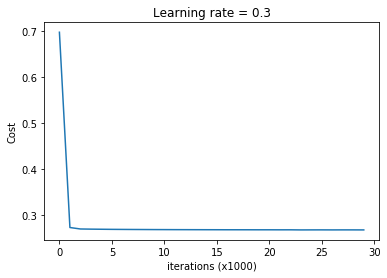

On the train set:
Accuracy: 0.9383886255924171
On the test set:
Accuracy: 0.93


In [25]:
params = model2(train_X, train_Y, lambd=0.7, print_cost=True)
print ("On the train set:")
predictions_train = predict(train_X, train_Y, params)
print ("On the test set:")
predictions_test = predict(test_X, test_Y, params)

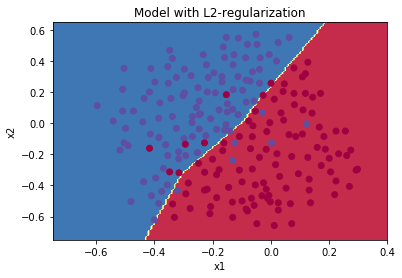

In [26]:
plt.title("Model with L2-regularization")
axes = plt.gca()
axes.set_xlim([-0.75,0.40])
axes.set_ylim([-0.75,0.65])
plot_decision_boundary(lambda x: predict_dec(params, x.T), train_X, train_Y)

- Train and Predict: Dropout

Cost after iteration 0: 0.654391


/home/denn1s/miniconda3/envs/ds/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
/home/denn1s/miniconda3/envs/ds/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in multiply
  after removing the cwd from sys.path.


Cost after iteration 10000: 0.061017
Cost after iteration 20000: 0.060582


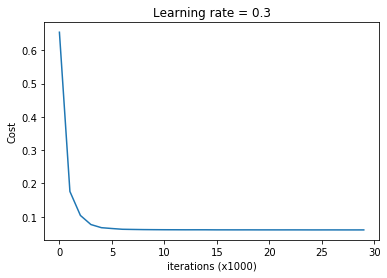

On the train set:
Accuracy: 0.9289099526066351
On the test set:
Accuracy: 0.95


In [27]:
params = model2(train_X, train_Y, keep_prob=0.86, print_cost=True)

print ("On the train set:")
predictions_train = predict(train_X, train_Y, params)
print ("On the test set:")
predictions_test = predict(test_X, test_Y, params)

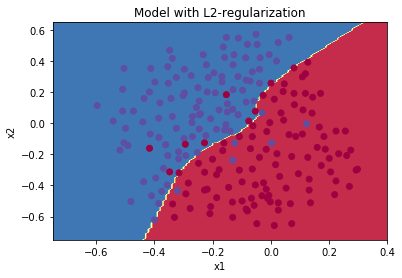

In [28]:
plt.title("Model with L2-regularization")
axes = plt.gca()
axes.set_xlim([-0.75,0.40])
axes.set_ylim([-0.75,0.65])
plot_decision_boundary(lambda x: predict_dec(params, x.T), train_X, train_Y)

# 3. Gradient Checking

## 3.1 Preprocessing
- Roll parameter dictionary to a vector

In [29]:
def params_to_vector(params):
    '''
    Roll parameters dictionary into a single vector
    '''
    
    keys = []
    count = 0
    
    for key in ['W1', 'b1', 'W2', 'b2', 'W3', 'b3']:
        param_flatten = np.reshape(params[key], (-1, 1))
        keys = keys + [key] * param_flatten.shape[0]
        
        if count == 0:
            theta = param_flatten
        else:
            theta = np.concatenate((theta, param_flatten), axis=0)
        
        count = count + 1
    
    return theta, keys

- Unroll vector back to parameter dictionary

In [30]:
def vector_to_params(theta):
    '''
    Unroll parameter dictionary from a single vector
    '''
    
    params = {}
    params['W1'] = theta[:20].reshape((5, 4))
    params["b1"] = theta[20:25].reshape((5,1))
    params["W2"] = theta[25:40].reshape((3,5))
    params["b2"] = theta[40:43].reshape((3,1))
    params["W3"] = theta[43:46].reshape((1,3))
    params["b3"] = theta[46:47].reshape((1,1))

    return params

- Roll gradients dictionary to a vector

In [31]:
def grads_to_vector(grads):
    '''
    Roll gradients dictionary into a single vector
    '''
    
    keys = []
    count = 0
    
    for key in ['dW1', 'db1', 'dW2', 'db2', 'dW3', 'db3']:
        grad_flatten = np.reshape(grads[key], (-1, 1))
        keys = keys + [key] * grad_flatten.shape[0]
        
        if count == 0:
            dtheta = grad_flatten
        else:
            dtheta = np.concatenate((dtheta, grad_flatten), axis=0)
        
        count = count + 1
    
    return dtheta, keys

## 3.2 Grad Check

In [32]:
def gradcheck(params, grads, X, Y, epsilon=1e-7):
    
    # Set up variables
    params_vector, _ = params_to_vector(params)
    grads_vector, _ = grads_to_vector(grads)
    n_params = params_vector.shape[0]
    J_plus = np.zeros((n_params, 1))
    J_minus = np.zeros((n_params, 1))
    grads_approx = np.zeros((n_params, 1))
    
    # Numerical approximation for gradients
    for i in range(n_params):
        
        ## J_plus[i]
        theta_plus = np.copy(params_vector)
        theta_plus[i, 0] = theta_plus[i, 0] + epsilon
        A3,_ = forward_propagation(X, vector_to_params(theta_plus))
        J_plus[i] = compute_cost(A3, Y)
        
        ## J_minus[i]
        theta_minus = np.copy(params_vector)
        theta_minus[i, 0] = theta_minus[i, 0] - epsilon
        A3,_ = forward_propagation(X, vector_to_params(theta_minus))
        J_minus[i] = compute_cost(A3, Y)
        
        ## grads_approx[i]
        grads_approx[i] = (J_plus[i] - J_minus[i])/(2 * epsilon)
        
    # Checking
    numerator = np.linalg.norm(grads_approx - grads_vector)
    denominator = np.linalg.norm(grads_approx) + np.linalg.norm(grads_vector)
    difference = numerator/denominator
    
    if difference > 2e-7:
        print ("\033[93m" + "There is a mistake in the backward propagation! difference = " + str(difference) + "\033[0m")
    else:
        print ("\033[92m" + "Your backward propagation works perfectly fine! difference = " + str(difference) + "\033[0m")
    
    return difference

## 3.3 Experiment
- Test case

In [33]:
np.random.seed(1)
x = np.random.randn(4,3)
y = np.array([1, 1, 0]).reshape((1, -1))
W1 = np.random.randn(5,4) 
b1 = np.random.randn(5,1) 
W2 = np.random.randn(3,5) 
b2 = np.random.randn(3,1) 
W3 = np.random.randn(1,3) 
b3 = np.random.randn(1,1) 
parameters = {"W1": W1,
              "b1": b1,
              "W2": W2,
              "b2": b2,
              "W3": W3,
              "b3": b3}

- Run

In [34]:
_, cache = forward_propagation(x, parameters)
gradients = backward_propagation(x, y, cache)

difference = gradcheck(parameters, gradients, x, y)

Your backward propagation works perfectly fine! difference = 1.1890913023330276e-07
